In [3]:
import ubsdp as sdp

In [4]:
import cvxopt as cvx

In [610]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [611]:
import numpy as np

In [7]:
m,n = 50,50
A = cvx.normal(m**2, n)

In [8]:
print(A[:5])

[ 1.34e-01]
[-8.81e-02]
[ 1.67e+00]
[ 7.34e-01]
[ 9.98e-01]



In [612]:
x1 = np.linspace(-5,5,100)
x3 = np.linspace(-5,5,100)
x1,x3 = np.meshgrid(x1,x3)
x2 = -x1

In [613]:
x1_2 = np.linspace(0,5,100)
x2_2 = np.linspace(0,5,100)
x1_2,x2_2 = np.meshgrid(x1_2,x2_2)
x3_2_1 = np.sqrt(x1_2*x2_2)
x3_2_2 = -x3_2_1

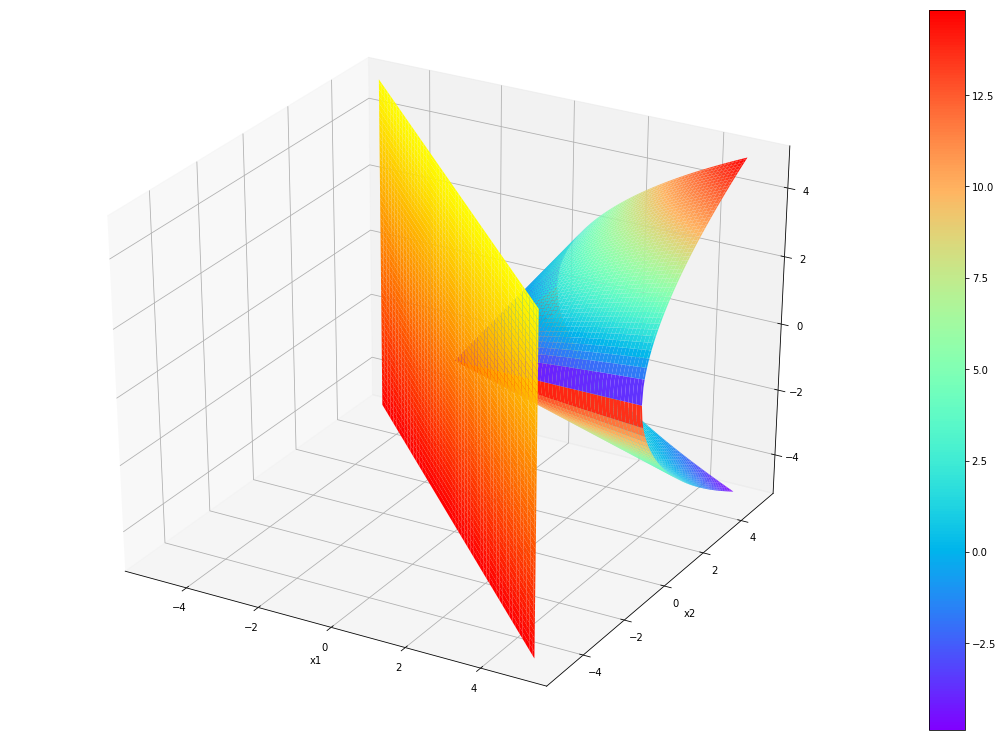

In [614]:
fig = plt.figure(figsize=[15,10])
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
#ax.view_init(azim=30, elev=30)
q1_1 = ax.plot_surface(x1,x2,x3, cmap=cm.autumn)
q1_2 = ax.plot_surface(x1_2,x2_2,x3_2_1, cmap=cm.rainbow)
q1_2 = ax.plot_surface(x1_2,x2_2,x3_2_2, cmap=cm.rainbow)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(my_surface)
plt.show()

In [619]:
x_1 = np.linspace(0.5,1,100)
z_1 = np.linspace(-1,1,100)
x_1,z_1 = np.meshgrid(x_1,z_1)
y_1 = 2-x_1

In [620]:
x_2 = np.linspace(.5,1,100)
z_2 = np.linspace(-1,1,100)
x_2,z_2 = np.meshgrid(x_2,z_2)
y_2 = 1-x_2

In [621]:
x_3 = np.linspace(0.5,1,100)
y_3 = np.linspace(0.5,1,100)
x_3,y_3 = np.meshgrid(x_3,y_3)
z_3_1 = np.sqrt(x_3 * y_3 - x_3 - y_3 + 1)
z_3_2 = -z_3_1

In [622]:
x_4 = np.linspace(.501,.99,100)
y_4 = np.linspace(.501,1,100)
x_4,y_4 = np.meshgrid(x_4,y_4)
z_4_1 = np.sqrt(x_4*y_4-(x_4+y_4)/2+1/4)
z_4_2 = -z_4_1

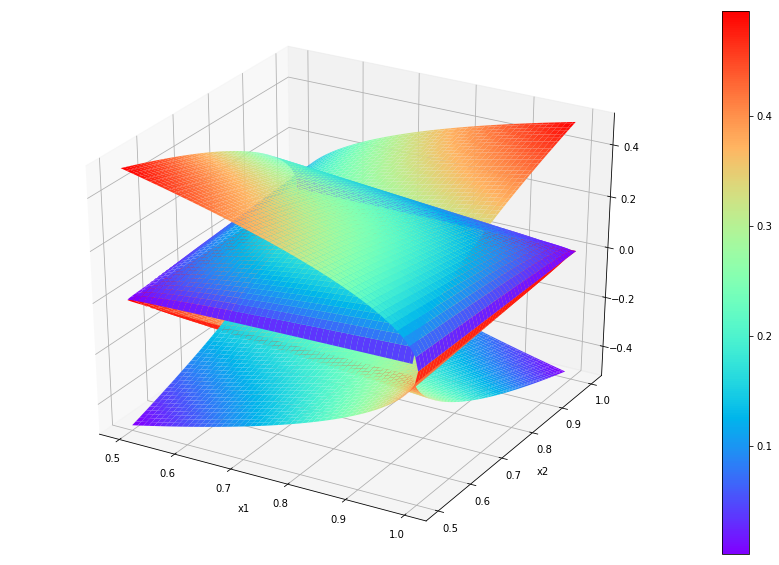

In [624]:
fig = plt.figure(figsize=[15,10])
ax = fig.gca(projection='3d')
ax.view_init(elev=30, azim=-60)
#q1_1 = ax.plot_surface(x_1,y_1,z_1, cmap=cm.rainbow, alpha=1)
#q1_2 = ax.plot_surface(x_2,y_2,z_2, cmap=cm.rainbow, alpha=.5)
q1_3 = ax.plot_surface(x_3,y_3,z_3_1, cmap=cm.rainbow, alpha=1)
q1_4 = ax.plot_surface(x_3,y_3,z_3_2, cmap=cm.rainbow, alpha=1)
q1_5 = ax.plot_surface(x_4,y_4,z_4_1, cmap=cm.rainbow, alpha=1)
q1_6 = ax.plot_surface(x_4,y_4,z_4_2, cmap=cm.rainbow, alpha=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(q1_3)
plt.show()

In [50]:
# day 3 lecture
A_l = cvx.matrix([[2/9,1/7],[1/4,1/3]])
c_l = cvx.matrix([-2.0,-3.0])
b_l = cvx.matrix([1.0,1.0])

In [51]:
sol = cvx.solvers.lp(c_l,A_l,b_l)
print(sol['x'])

Optimal solution found.
[ 2.17e+00]
[ 2.07e+00]



In [615]:
import cvxpy as cvp

In [56]:
xp1 = cvp.Variable()
xp2 = cvp.Variable()
constraints = [2*xp1/9 + xp2/4 < 1.0,
                  xp1/7 + xp2/3 < 1.0]
obj = cvp.Minimize((-2.0*xp1 - 3.0*xp2))
prob = cvp.Problem(obj,constraints)
prob.solve()

-10.551724114449781

In [57]:
print(prob.status)

optimal


In [58]:
print(xp1.value)

2.17241379455


In [617]:
# SDP in CVX



x1_r = np.array([])
x2_r = np.array([])
x3_r = np.array([])
for i in range(200):
    
    #X_s = np.array([[xs1,xs3],[xs3,xs2]])
    X_s = cvp.Semidef(2)
    #X_s = cvp.Variable(2,2)
    c_s = cvp.Symmetric(2)
    #c_ss = np.random.rand(200,size=2)-100
    #c_ss = np.random.randint(100,size=2)
    c_ss = np.random.rand(3)*200-100
    c_ss[0] = 10*np.random.rand(1)-5
    c_ss[1] = 10*np.random.rand(1)-5
    c_ss[2] = 10*np.random.rand(1)-5
    constraints_s = [X_s >> .5*np.eye(2),
                    X_s << np.eye(2)]
    obj_s = cvp.Minimize(c_ss[0]*X_s[0,0] + c_ss[1]*X_s[1,1] + c_ss[2]*X_s[1,0])
    prob = cvp.Problem(obj_s, constraints_s)
    prob.solve()
    x1_r = np.append(x1_r, X_s[0,0].value)
    x2_r = np.append(x2_r, X_s[1,1].value)
    x3_r = np.append(x3_r, X_s[1,0].value)
print(c_ss)
print(X_s.value)

[ 0.72442467  3.80604215  4.30802631]
[[ 0.89544877 -0.20333385]
 [-0.20333385  0.60455123]]


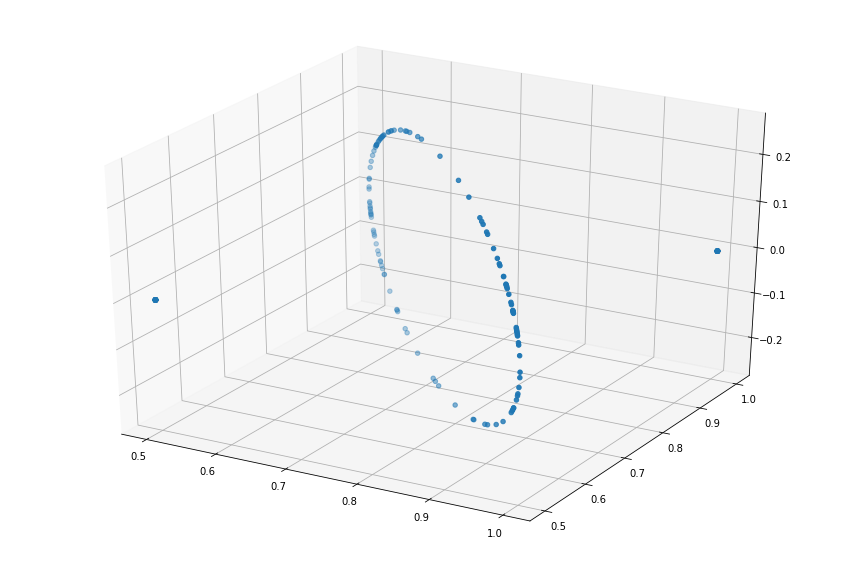

In [618]:
fig = plt.figure(figsize=[15,10])
ax = fig.gca(projection='3d')
lord = ax.scatter(x1_r,x2_r,x3_r)
plt.show()

In [576]:
X_s[0,0].value

0.9999999983627829

In [82]:
C_tst = np.array([[1,2],[3,4]])

In [83]:
X_tst = np.arange(3,12,1).reshape(3,3)

In [85]:
C_tst.dot(X_tst)

ValueError: shapes (2,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)